# ✈️ Flight Delays Analysis – Exploratory Data Analysis (EDA)

This notebook is part of the **`flight-delays-analysis`** project. The goal is to analyze real-world flight delay data from the United States to uncover meaningful patterns and develop a basic predictive model.

---

## 🎯 Notebook Objectives

- Load the raw dataset
- Understand the structure and quality of the data
- Detect missing values, duplicates, and irrelevant features
- Identify initial patterns related to delays and cancellations

---

## 📁 Dataset Overview

The dataset contains flight records with variables such as:

- Airline, origin, destination
- Scheduled departure and arrival times
- Delay causes (weather, security, etc.)
- Cancellation information

Source: [Kaggle – Airline Delay Causes](https://www.kaggle.com/datasets/giovamata/airlinedelaycauses)

---

## 🧠 Notes

- This EDA focuses solely on **delay behavior**, not external economic or meteorological data.
- Key findings will be used later as a foundation for modeling and reporting.

---

📌 Author: **Josekawa** – 2025  
🔗 GitHub Repository: [github.com/Josekawa/flight-delays-analysis](https://github.com/Josekawa/flight-delays-analysis)



## 📋 What I want to accomplish in this notebook

This notebook is all about exploring the data, understanding what I'm working with, and preparing a clean version of the dataset for modeling later. Here's the roadmap I'm following:

---

### 1. 📥 Load the dataset  
- Import core libraries (pandas, numpy, matplotlib, seaborn)
- Load the raw CSV from the `/data/raw/` folder
- Preview the data to make sure it’s loaded correctly

### 2. 🔍 Initial inspection  
- Use `.info()`, `.describe()`, `.shape`, and `.columns`
- Get a feel for the structure, types, and size of the dataset
- Add personal notes about what stands out

### 3. 🧹 Data cleaning  
- Drop unnecessary columns (like `Unnamed: 0`)
- Identify and handle missing values
- Replace missing delay values with 0 if they’re logically just “no delay”

### 4. 📄 Column documentation  
- Write out what each column means
- Highlight which ones I think will matter later (and why)

### 5. 📊 Exploratory visuals  
- How many flights were cancelled?
- Delay distributions (`ArrDelay`, `DepDelay`)
- Patterns by airline, day of week, airport, etc.
- Use boxplots, bar plots, and countplots to explore

### 6. 🔗 Correlations  
- Look at the relationship between delay causes and arrival delay
- Visualize with a heatmap and summarize what seems important

### 7. 💾 Save cleaned data  
- Save the preprocessed dataset to `/data/processed/`
- That way I can reuse it easily in the modeling notebook

### 8. 🧠


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup for visualizations
plt.style.use('seaborn-whitegrid')
sns.set_palette('pastel')
%matplotlib inline

# 📄 Load the dataset
file_path = '../data/raw/DelayedFlights.csv'
df = pd.read_csv(file_path)

# 🔍 Quick preview
print(f"Shape of dataset: {df.shape}")
df.head()



,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Información general del dataset
df.info()

# Estadísticas de columnas numéricas
df.describe()

# Ver nombres de columnas
df.columns

# Ver tamaño del dataset
df.shape

# Comprobar nulos
df.isnull().sum()

# Ver duplicados
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

0

## 🧹 Dropping `Unnamed: 0`

The first thing I noticed is that there's a column called `Unnamed: 0`, which is just an automatic index that got saved when the CSV was originally exported. Since it doesn’t carry any useful information, I’m dropping it right away to keep the dataset clean.

No need to analyze noise.


In [5]:
# This column was automatically generated when the CSV was saved with an index
# It doesn't add any value to the analysis, so I'll drop it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Let's check how many missing values we have in each column
df.isnull().sum().sort_values(ascending=False)

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


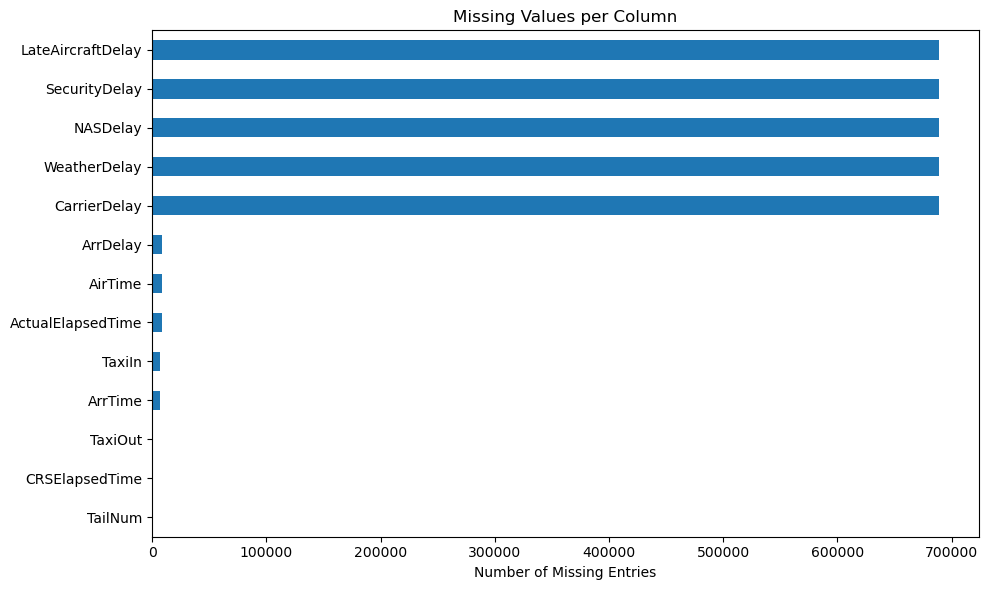

In [6]:
import matplotlib.pyplot as plt

# Plot missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
missing.plot(kind='barh')
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Entries')
plt.tight_layout()
plt.show()


## 📄 Column Definitions (for reference)

Before diving deeper, I want to document what each column represents — both for myself and anyone else reading this later. Here's a quick overview of the variables in this dataset:

- `Year`: Always 2008
- `Month`: 1–12
- `DayofMonth`: 1–31
- `DayOfWeek`: 1 = Monday, 7 = Sunday
- `DepTime`: Actual departure time (local, hhmm)
- `CRSDepTime`: Scheduled departure time
- `ArrTime`: Actual arrival time
- `CRSArrTime`: Scheduled arrival time
- `UniqueCarrier`: Airline code
- `FlightNum`: Flight number
- `TailNum`: Aircraft tail number (unique ID)
- `ActualElapsedTime`: Minutes in air (actual)
- `CRSElapsedTime`: Minutes in air (scheduled)
- `AirTime`: Time in flight
- `ArrDelay`: Arrival delay in minutes  
- `DepDelay`: Departure delay in minutes
- `Origin`: Origin airport (IATA)
- `Dest`: Destination airport (IATA)
- `Distance`: Distance between airports (miles)
- `TaxiIn`: Time spent taxiing after landing (min)
- `TaxiOut`: Time spent taxiing before takeoff (min)
- `Cancelled`: 1 = Yes, 0 = No
- `CancellationCode`: Reason (A = carrier, B = weather, C = NAS, D = security)
- `Diverted`: 1 = Yes, 0 = No
- `CarrierDelay`: Airline responsibility (e.g. maintenance, crew)
- `WeatherDelay`: Due to hazardous weather
- `NASDelay`: NAS-related (air traffic, runways, etc.)
- `SecurityDelay`: Security-related issues
- `LateAircraftDelay`: Caused by late arrival of aircraft from a previous flight

This is going to help me later when deciding which features to include in the model — and which ones probably won’t help much.


## ✈️ Understanding the `Cancelled` column

The `Cancelled` column is binary:
- `0` means the flight operated normally
- `1` means the flight was cancelled

This is useful both for filtering out cancelled flights when analyzing delays, and also as a potential **target variable** for classification if I want to predict cancellations later.


In [8]:
df['Cancelled'].value_counts()



0    1936125
1        633
Name: Cancelled, dtype: int64